In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = 'True'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model =  models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-Trans_learn(VGG16).h5")

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 100,
                    epochs = 5,
                    validation_data = validation_generator,
                    validation_steps = 50,
                    callbacks = [checkpoint_cb])

Epoch 1/5
100/100 [==============================] - 897s 9s/step - loss: 0.3160 - acc: 0.8685 - val_loss: 0.2218 - val_acc: 0.8940
Epoch 2/5
100/100 [==============================] - 915s 9s/step - loss: 0.2516 - acc: 0.8980 - val_loss: 0.1869 - val_acc: 0.9210
Epoch 3/5
100/100 [==============================] - 900s 9s/step - loss: 0.1894 - acc: 0.9240 - val_loss: 0.1057 - val_acc: 0.9510
Epoch 4/5
100/100 [==============================] - 896s 9s/step - loss: 0.1698 - acc: 0.9280 - val_loss: 0.1267 - val_acc: 0.9550
Epoch 5/5
100/100 [==============================] - 888s 9s/step - loss: 0.1468 - acc: 0.9425 - val_loss: 0.1119 - val_acc: 0.9590


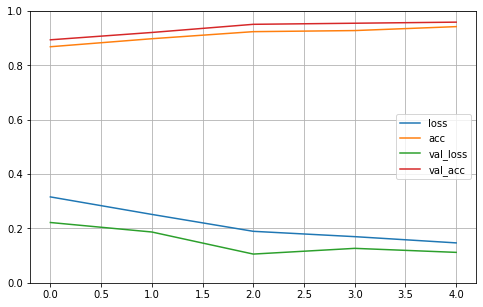

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator, steps = 50)

50/50 [==============================] - 104s 2s/step - loss: 0.1285 - acc: 0.9580


[0.1284615397453308, 0.9580000042915344]